In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data=pd.read_csv('BA_reviews.csv')
data

,reviews
0,✅ Trip Verified | British Airways is absolute ...
1,✅ Trip Verified | The flight time was changed ...
2,✅ Trip Verified | I'm so fraustrated. My fli...
3,✅ Trip Verified | We have sat on this plane fo...
4,Not Verified | British Airways stranding my w...
...,...
3893,Flew LHR - VIE return operated by bmi but BA a...
3894,LHR to HAM. Purser addresses all club passenge...
3895,My son who had worked for British Airways urge...
3896,London City-New York JFK via Shannon on A318 b...


**Removing `Not Verified` and `Trip Verified` from reviews**

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, `✅ Trip Verified`can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [3]:
from nltk.tokenize import wordpunct_tokenize

# Define the tokenization function
def tokenize_text(text):
    """
    Tokenizes the input text using NLTK's wordpunct_tokenize.
    """
    return wordpunct_tokenize(text)

In [4]:
import unicodedata
# removing extra charectors or emojies
def remove_non_ASCII_before(text):
    new_text=[]
    for i in text:
        normalized_text = unicodedata.normalize('NFKD', i).encode('ascii', 'ignore').decode('utf-8','ignore')
        new_text.append(normalized_text)
    return ' '.join(new_text)

In [5]:
# Define a function to separate verification status
def separate_verification(review):
    """
    Separates the verification status (e.g., 'Trip Verified' or 'Not Verified')
    from the main review content.
    """
    return review.split('|')

In [6]:
#this are irrelavent for further anlysis
irrelavent_list=['Not Verified ',' Trip Verified ']
def remove_verified(text):
    new_text=[]
    for i in text:
        if i not in irrelavent_list:
            new_text.append(i)
    return ' '.join(new_text)

**`Contractions:`**
    
Contractions are shortened forms of word combinations, such as "can't" for "cannot" or "won't" for "will not." In written and spoken English

In [7]:
import contractions

def replace_contractions(data):
    '''
    Replace contractions in string of text
    '''
    return contractions.fix(data)

**`Removing Deigits from data`**

In [8]:
import re
def remove_numbers(text):
    text = re.sub(r'\d+','', text) 
    return text

**`Removing extra space from reviews`**

In [9]:
def remove_space(text):
    text = re.sub(r'\s+',' ', text) 
    return text

**`Removing Punctuations from Reviews`**

In [10]:
import nltk
import string
nltk.download('punkt')


def punctuatin_remove(text):
    cleaned_text = text.translate(str.maketrans('', '', string.punctuation))
    return cleaned_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**`Tokenization`**

In [11]:
from nltk.tokenize import wordpunct_tokenize

# Define the tokenization function
def tokenize_text(text):
    """
    Tokenizes the input text using NLTK's wordpunct_tokenize.
    """
    return wordpunct_tokenize(text)

**`Removing punctuations after Tokenizing`**

In [12]:
def remove_punctuation(text):
    list_1=[]
    for word in text:
        txt = re.sub(r'[^\w\s]','', word) 
        list_1.append(txt)
    return list_1

**`unicodedata`**

The unicodedata module provides access to the Unicode Character Database, allowing you to inspect and manipulate Unicode characters, which is crucial for handling text in multiple languages and scripts.

In [13]:
import unicodedata
def remove_non_ASCII(text):
    new_text=[]
    for i in text:
        normalized_text = unicodedata.normalize('NFKD', i).encode('ascii', 'ignore').decode('utf-8','ignore')
        new_text.append(normalized_text)
    return new_text

**`Lowercasing all words`**

In [14]:
def lower_case(text):
    new_text=[]
    for i in text:
        new_text.append(i.lower())
    return new_text

**`Removing Stopwords`**

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords 

stopwords = stopwords.words('english')
stopwords_list=stopwords
stopwords_list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
def remove_stopwrods(text):
    new_text=[]
    for i in text:
        if i not in stopwords_list:
            new_text.append(i)
    return new_text

**`Lemmatization`**

In [17]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

def lemmatization(text):
    new_text=[]
    for i in text:
        text=lemmatizer.lemmatize(i,pos='v')
        new_text.append(text)
    return new_text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [91]:
def normalize(text):
    text=tokenize_text(text)
    text=remove_non_ASCII_before(text)
    text=separate_verification(text)
    text=remove_verified(text)
    text=replace_contractions(text)
    text=remove_numbers(text)
    text=remove_space(text)
    text=punctuatin_remove(text)
    text=tokenize_text(text)
    text=remove_punctuation(text)
    text=remove_non_ASCII(text)
    text=lower_case(text)
    text=remove_stopwrods(text)
    text=lemmatization(text)
    return ' '.join(text)
  
data['reviews']=data['reviews'].apply(lambda x:normalize(x))
data

,reviews
0,british airways absolute rubbish fly amsterdam...
1,flight time change last minute without warn as...
2,fraustrated flight cancel last minute end worl...
3,sit plane hour forty five minutes await takeof...
4,british airways strand wife heathrow airport d...
...,...
3893,fly lhr vie return operate bmi ba aircraft air...
3894,lhr ham purser address club passengers name bo...
3895,son work british airways urge fly british airw...
3896,london city new york jfk via shannon really ni...


# word cloud

In [19]:
from wordcloud import WordCloud,STOPWORDS

In [20]:
words=' '.join(data['reviews'])
words

'british airways absolute rubbish fly amsterdam urgent appointment flight cancel last minute presumably due bad weather keep us gate say plane land literally every plane airport take land zero issue another klm flight amsterdam schedule depart time take time another klm flight amsterdam later even also take without problems one operate british airways cancel bad weather apparently weather bad every plane could land take successfully apart rebook eurostar next day would still miss important appointment intend go amsterdam thank british airways flight time change last minute without warn assistance provide grind staff rd party agents regard impact delay help forthcoming phoneline nobody airline want take responsibility anything fundamentally unreliable airline onboard service poor even good low cost airlines fraustrated flight cancel last minute end world even though earliest could get book three days later insane saga events proceed claim compensation legally entitle accord eu rule use 

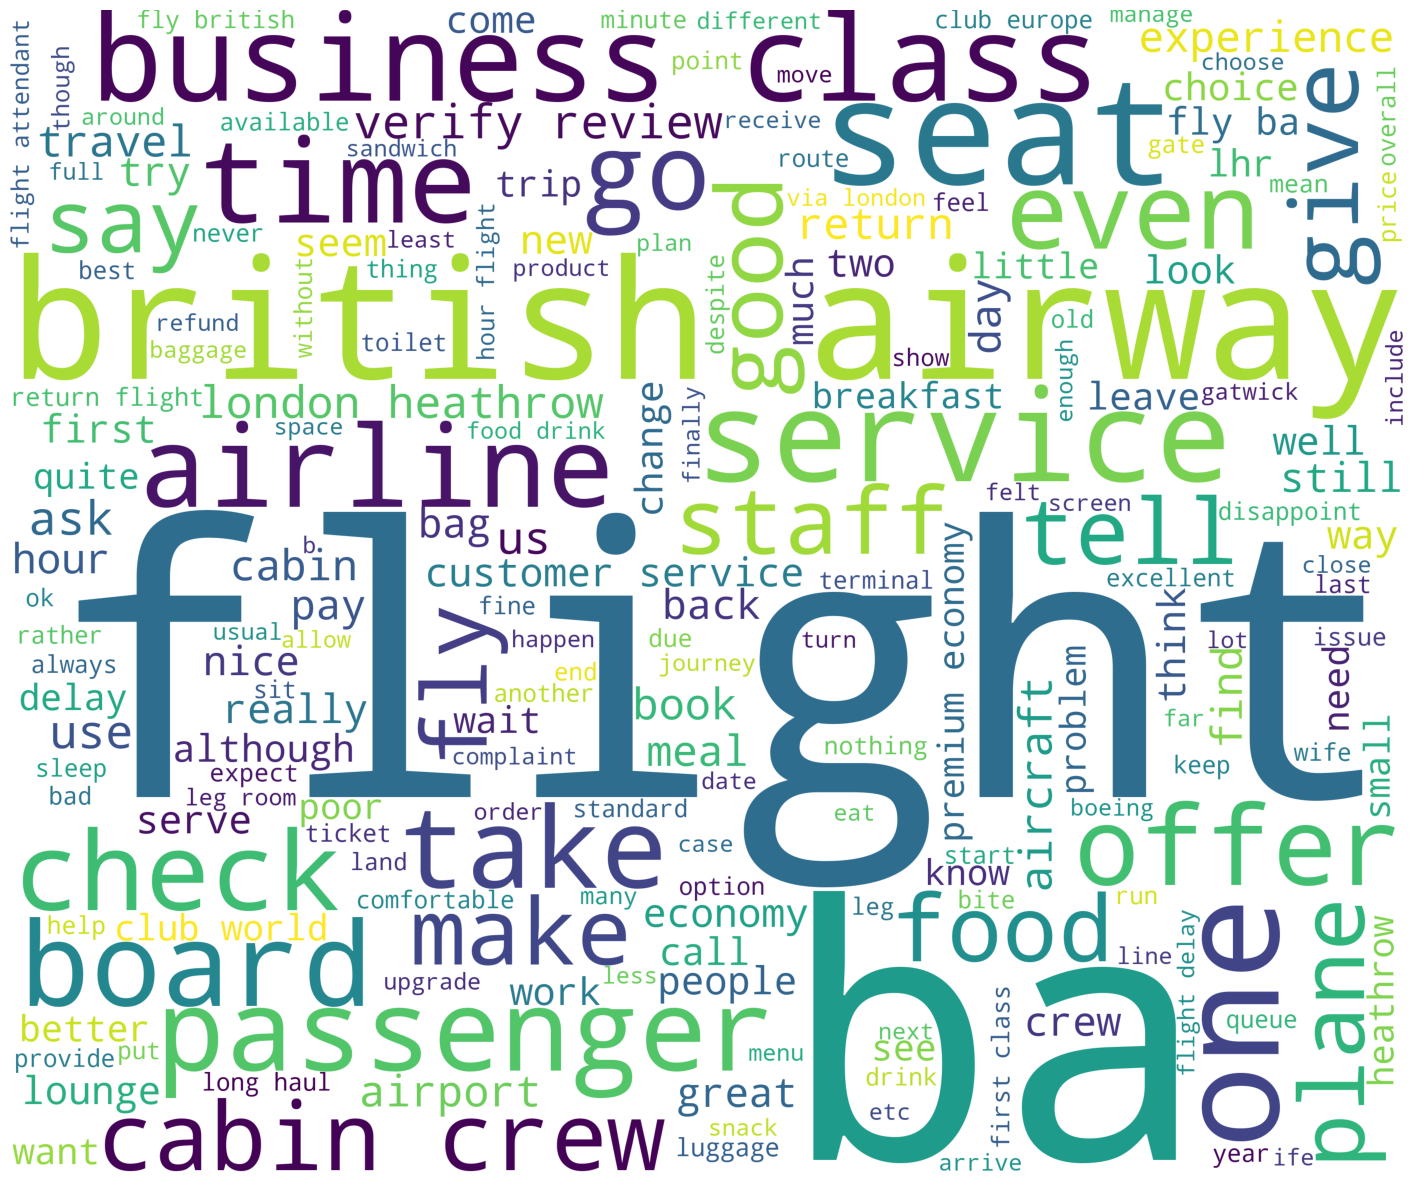

In [21]:
from wordcloud import WordCloud,STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,  # excludes common stopwords
                      background_color='White',
                      width=3000,
                      height=2500
                     ).generate(words)

plt.subplots(figsize=(18,18))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Save WordCloud image
# wordcloud.to_file('wordcloud.png')

### Sentiment Analysis

In [92]:
from textblob import TextBlob

# Function to get the sentiment polarity
def get_sentiment(text):
    analysis= TextBlob(text)
    return analysis.sentiment.polarity 

data['sentiment_value']=data['reviews'].apply(lambda x:get_sentiment(x))

In [93]:
data['sentiment_value']

0      -0.001667
1       0.075000
2      -0.113889
3       0.022024
4       0.020000
          ...   
3893    0.403725
3894    0.202083
3895    0.147778
3896    0.306061
3897    0.001042
Name: sentiment_value, Length: 3898, dtype: float64

In [94]:
# labeling setiment based on sentiment polarity
def sentiment(text):
    if text>0.1:
        return 'positive'
    elif text<0:
        return 'negative'
    else:
        return 'neutral'
    
data['sentiment_label']=data['sentiment_value'].apply(lambda x:sentiment(x))

In [95]:
#encoding the sentiment polarity
def sentiment_num(text):
    if text>0.1:
        return 2
    elif text<0:
        return 0
    else:
        return 1
    
data['sentiment_label_encode']=data['sentiment_value'].apply(lambda x:sentiment_num(x))

In [165]:
data.head()

,reviews,sentiment_value,sentiment_label,sentiment_label_encode
0,british airways absolute rubbish fly amsterdam...,-0.001667,negative,0
1,flight time change last minute without warn as...,0.075000,neutral,1
2,fraustrated flight cancel last minute end worl...,-0.113889,negative,0
3,sit plane hour forty five minutes await takeof...,0.022024,neutral,1
4,british airways strand wife heathrow airport d...,0.020000,neutral,1


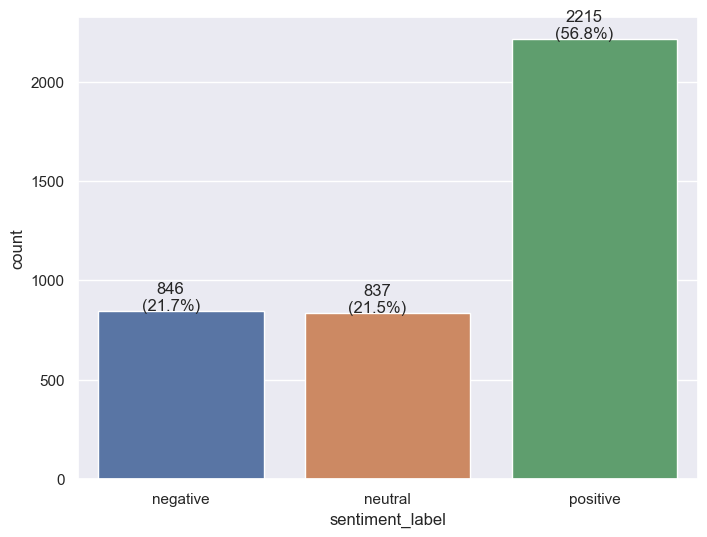

In [97]:
#ploting the distribution of reveiws based on sentiment
plt.subplots(figsize=(8,6))
sns.set()
ax=sns.countplot(
    data = data,
    x='sentiment_label')


# Calculate total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = int(p.get_height())  # Get the height of each bar (count)
    percentage = f'{100 * count / total:.1f}%'  # Calculate the percentage
    x = p.get_x() + p.get_width() / 2 - 0.05  # Adjust x position for better alignment
    y = p.get_height() + 0.5  # Adjust y position to place above the bar
    ax.annotate(f'{count}\n({percentage})', (x, y), size=12, ha='center')  # Annotate the plot
    plt.savefig('sentiment_bar.png')  # Save the chart


plt.show()

### Rating the reveiws by using `Kmeans` Clustering

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
df=data.copy()
# Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['reviews']).toarray()


In [99]:
#creating dataframe of TF-IDF data
tfidf_data=pd.DataFrame(tfidf_matrix)
tfidf_data['sentiment_score']=df['sentiment_value']
tfidf_data['sentiment_label_encode']=df['sentiment_label_encode']
# Convert all column names to strings
tfidf_data.columns = tfidf_data.columns.astype(str)
tfidf_data

,0,1,2,3,4,5,6,7,8,9,...,10001,10002,10003,10004,10005,10006,10007,10008,sentiment_score,sentiment_label_encode
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001667,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075000,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.113889,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022024,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.403725,2
3894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202083,2
3895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.147778,2
3896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.306061,2


In [100]:
tfidf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Columns: 10011 entries, 0 to sentiment_label_encode
dtypes: float64(10010), int64(1)
memory usage: 297.7 MB


In [101]:
df.head()

,reviews,sentiment_value,sentiment_label,sentiment_label_encode
0,british airways absolute rubbish fly amsterdam...,-0.001667,negative,0
1,flight time change last minute without warn as...,0.075000,neutral,1
2,fraustrated flight cancel last minute end worl...,-0.113889,negative,0
3,sit plane hour forty five minutes await takeof...,0.022024,neutral,1
4,british airways strand wife heathrow airport d...,0.020000,neutral,1


In [64]:
# rating with clustering
from sklearn.cluster import KMeans
num_clusters = 5  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_data)
cluster=kmeans.predict(tfidf_data)
print(cluster)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 2 1 ... 4 0 2]


In [102]:
df['Cluster']=cluster
data['Cluster']=cluster

In [103]:
data.head()

,reviews,sentiment_value,sentiment_label,sentiment_label_encode,Cluster
0,british airways absolute rubbish fly amsterdam...,-0.001667,negative,0,1
1,flight time change last minute without warn as...,0.075000,neutral,1,2
2,fraustrated flight cancel last minute end worl...,-0.113889,negative,0,1
3,sit plane hour forty five minutes await takeof...,0.022024,neutral,1,2
4,british airways strand wife heathrow airport d...,0.020000,neutral,1,2


In [104]:
data['Cluster'].value_counts()

Cluster
1    846
2    837
4    801
3    778
0    636
Name: count, dtype: int64

In [105]:
data[data['sentiment_label']=='negative']['Cluster'].value_counts()

Cluster
1    846
Name: count, dtype: int64

In [106]:
data[data['sentiment_label']=='neutral']['Cluster'].value_counts()

Cluster
2    837
Name: count, dtype: int64

In [107]:
data[data['sentiment_label']=='positive']['Cluster'].value_counts()

Cluster
4    801
3    778
0    636
Name: count, dtype: int64

In [108]:
data[data['Cluster']==4]

,reviews,sentiment_value,sentiment_label,sentiment_label_encode,Cluster
11,flight cancel refund money say take flight nev...,0.136364,positive,2,4
12,visa issue hence debar fly grind staff mumbai ...,0.231250,positive,2,4
20,fly ba years american airlines ff give ba gold...,0.196078,positive,2,4
24,appal service fail defective fleet aircraft fl...,0.168750,positive,2,4
25,british airways charge pleasure choose seat pu...,0.104976,positive,2,4
...,...,...,...,...,...
3874,lanzarote gatwick th april flight okay arrival...,0.112500,positive,2,4
3882,interest contrast recent gatwick turin back fl...,0.224242,positive,2,4
3883,heathrow marrakech previously travel british m...,0.136667,positive,2,4
3884,flight heathrow toronto book emergency exit se...,0.150000,positive,2,4


In [109]:
#after clustering rating properly based on average setimanet_value
data.groupby(['Cluster'])['sentiment_value'].mean().reset_index().sort_values(by='sentiment_value').reset_index(drop=True)

,Cluster,sentiment_value
0,1,-0.114099
1,2,0.049566
2,4,0.181265
3,3,0.200040
4,0,0.400545


In [112]:
# Rating the reveiws based on Cluster
def Ratings(cluster):
    if cluster==1:
        return 1
    elif cluster==2:
        return 2
    elif cluster==4:
        return 3
    elif cluster==3:
        return 4
    else:
        return 5  
    
data['Ratings']=data['Cluster'].apply(lambda x:Ratings(x))

In [114]:
data.head()

,reviews,sentiment_value,sentiment_label,sentiment_label_encode,Cluster,Ratings
0,british airways absolute rubbish fly amsterdam...,-0.001667,negative,0,1,1
1,flight time change last minute without warn as...,0.075000,neutral,1,2,2
2,fraustrated flight cancel last minute end worl...,-0.113889,negative,0,1,1
3,sit plane hour forty five minutes await takeof...,0.022024,neutral,1,2,2
4,british airways strand wife heathrow airport d...,0.020000,neutral,1,2,2


### Ratings classifiaction using `ANN`

In [120]:
tfidf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,10001,10002,10003,10004,10005,10006,10007,10008,sentiment_score,sentiment_label_encode
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001667,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075000,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.113889,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022024,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020000,1


In [123]:
# TF-IDF of reveiws
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
# Combine TF-IDF with sentiment_score and sentiment_label
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Encode sentiment_label (categorical feature)
encoder = OneHotEncoder()
sentiment_encoded = encoder.fit_transform(data[['sentiment_label_encode']]).toarray()

# Normalize sentiment_score
scaler = MinMaxScaler()
normalized_score = scaler.fit_transform(data[['sentiment_value']])

# Combine all features
X = np.hstack((tfidf_matrix, normalized_score, sentiment_encoded))


In [126]:
#One-hot encode the Ratings column
target_encoder = OneHotEncoder()
y = target_encoder.fit_transform(data[['Ratings']]).toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [128]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'shape of X_train{X_train.shape}')

shape of X_train(3118, 10013)


In [136]:
X_train.shape[1]

10013

In [135]:
y_train.shape[1]

5

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

#Build the ANN model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Output neurons = number of rating categories
])

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │       1,281,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,290,373 (4.92 MB)

 Trainable params: 1,290,373 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [140]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [141]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5796 - loss: 1.4037 - val_accuracy: 0.7917 - val_loss: 0.5915
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8055 - loss: 0.4970 - val_accuracy: 0.8478 - val_loss: 0.4092
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9053 - loss: 0.2769 - val_accuracy: 0.8846 - val_loss: 0.2950
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9704 - loss: 0.1325 - val_accuracy: 0.8846 - val_loss: 0.2744
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9900 - loss: 0.0599 - val_accuracy: 0.8958 - val_loss: 0.2808
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9956 - loss: 0.0351 - val_accuracy: 0.8878 - val_loss: 0.2798
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 1.0000 - loss: 0.0204 - val_accuracy: 0.8846 - val_loss: 0.2910
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 1.0000 - loss: 0.0115 - val_accuracy: 0.8910 - v

In [142]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8793 - loss: 0.3839
Test Accuracy: 87.95%


In [147]:
import tensorflow as tf

# Make predictions
predictions = model.predict(X_test) # raw outputs of the model
predicted_ratings = tf.argmax(predictions, axis=1).numpy() #converts row oytput into predicted classes

# Display predictions
print("Predicted Ratings:", predicted_ratings)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Predicted Ratings: [3 2 3 1 1 4 3 1 1 3 1 2 1 4 3 4 0 0 0 3 2 1 4 2 2 1 1 3 2 4 3 3 0 4 1 3 0
 3 0 3 3 0 3 4 2 1 3 2 2 0 2 1 4 4 0 4 1 3 3 1 3 2 0 3 1 1 0 4 1 2 2 2 0 0
 1 1 2 4 0 3 2 2 0 3 2 0 3 3 0 1 0 0 0 3 2 4 3 0 1 3 2 3 2 4 1 4 2 0 1 1 1
 3 3 1 3 0 4 1 3 1 2 3 0 3 0 0 2 4 0 2 0 1 3 1 0 2 1 1 1 1 0 1 1 4 1 3 4 2
 2 1 2 2 4 1 3 0 1 2 0 1 0 1 1 1 0 3 1 0 1 3 3 0 2 1 3 4 2 2 4 1 1 4 3 2 2
 0 0 1 3 4 2 2 1 2 1 2 0 1 2 0 3 4 0 2 4 4 3 1 3 0 0 1 0 0 0 3 3 1 3 2 1 2
 1 0 0 1 3 2 4 2 1 1 2 2 1 3 2 1 1 3 1 2 1 1 2 3 4 3 3 1 2 2 2 2 2 0 4 3 1
 3 2 3 4 3 1 1 4 1 0 1 4 0 1 4 1 0 3 2 1 1 4 1 3 3 2 0 3 2 1 0 1 2 2 1 0 0
 3 1 1 3 4 3 4 0 1 2 3 2 1 2 1 4 3 0 2 0 0 1 0 3 2 4 4 0 3 0 4 3 3 1 3 4 3
 0 1 3 0 0 4 4 2 1 0 3 3 4 1 0 3 3 2 0 1 0 3 3 1 1 3 2 2 1 1 2 4 1 0 1 3 0
 2 1 2 1 1 3 2 0 2 3 0 0 0 1 2 3 2 4 3 4 3 0 3 3 2 1 2 2 0 1 0 2 2 2 0 2 2
 3 4 3 0 1 3 4 0 4 2 4 3 4 3 0 3 2 1 2 4 1 1 1 1 2 3 2 1 0 2 4 0 2 4 1 0 2
 4 4 4 0 3 0 3 3 0 0 2 2 3 0 0 0 3 4 1 1 2

In [152]:
#inversing one hot encoding to normal output
y_test_normal=np.argmax(y_test, axis=1)
y_test_normal

array([3, 2, 3, 1, 1, 4, 3, 1, 1, 4, 1, 3, 1, 4, 3, 4, 0, 0, 0, 3, 2, 1,
       4, 2, 2, 1, 1, 3, 2, 2, 3, 3, 0, 4, 1, 3, 0, 4, 0, 2, 3, 0, 3, 4,
       4, 1, 3, 2, 2, 0, 2, 1, 4, 4, 0, 4, 1, 3, 3, 1, 4, 2, 0, 3, 1, 1,
       0, 4, 1, 2, 2, 2, 0, 0, 1, 1, 2, 4, 0, 2, 2, 3, 0, 4, 4, 0, 3, 3,
       0, 1, 0, 0, 0, 3, 4, 4, 3, 0, 1, 3, 2, 4, 2, 4, 1, 4, 4, 0, 1, 1,
       1, 4, 3, 1, 4, 0, 4, 1, 3, 1, 2, 3, 0, 3, 0, 0, 4, 4, 0, 2, 0, 1,
       3, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 4, 1, 4, 4, 2, 2, 1, 2, 2, 4, 1,
       4, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 3, 1, 0, 1, 3, 4, 0, 2, 1, 3, 4,
       2, 2, 4, 1, 1, 4, 3, 2, 2, 0, 0, 1, 2, 4, 2, 3, 1, 2, 1, 2, 0, 1,
       2, 0, 3, 4, 0, 2, 4, 4, 2, 1, 4, 0, 0, 1, 0, 0, 0, 3, 3, 1, 3, 4,
       1, 3, 1, 0, 0, 1, 4, 2, 3, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 3, 1, 2,
       1, 1, 2, 3, 3, 3, 2, 1, 2, 2, 4, 2, 2, 0, 4, 2, 1, 3, 2, 4, 4, 3,
       1, 1, 4, 1, 0, 1, 2, 0, 1, 4, 1, 0, 3, 2, 1, 1, 4, 1, 3, 3, 2, 0,
       3, 2, 1, 0, 1, 2, 3, 1, 0, 0, 3, 1, 1, 3, 4,

In [153]:
### Generate the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_normal, predicted_ratings)
print(cm)

[[153   0   0   0   0]
 [  0 185   0   0   0]
 [  0   0 127  20   3]
 [  0   0   9 133  13]
 [  0   0  20  29  88]]


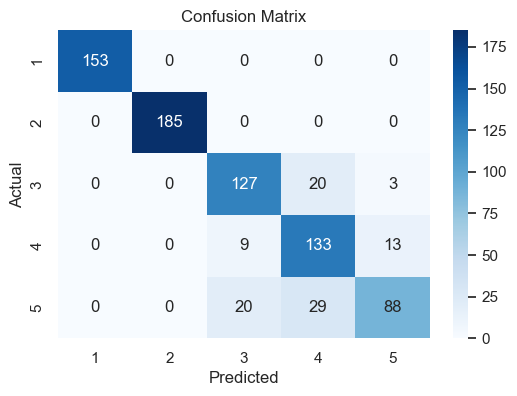

In [160]:
### Plot the confusion matrix

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(np.argmax(y_test, axis=1)+1), 
            yticklabels=np.unique(np.argmax(y_test, axis=1)+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()